In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
file_name='dataset/dataset/lab1_kc_house_data_1.csv'

df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Dealing with Missing Values

In [3]:
print(df.isnull().sum())

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


In [4]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
# Check for missing value in columns
print(df.isnull().sum())

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Question 1: Display the data types of each column using the function dtypes


In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Question 2: Drop the columns 'id" and 'Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data

In [7]:
df = df.drop(['id','Unnamed: 0'], axis = 1)
df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 3 Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [7]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Question 4 Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

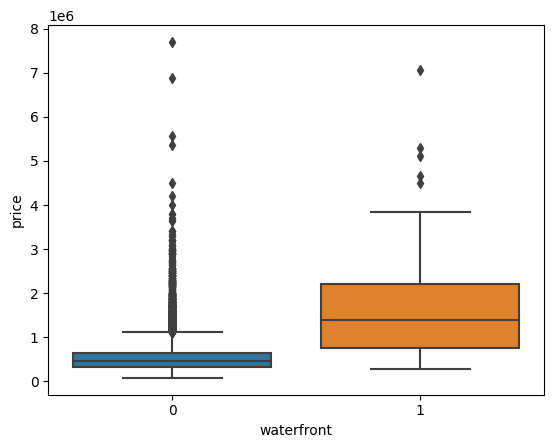

In [8]:
sns.boxplot(x='waterfront', y='price', data=df)


# Question 5 Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

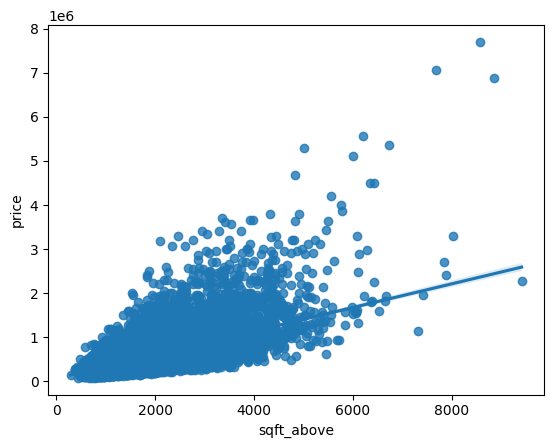

In [9]:
sns.regplot(x='sqft_above', y='price', data=df)

# Question 6 Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [10]:
X = df[['sqft_living']]
Y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


In [11]:
lm = LinearRegression()
lm.fit(x_train,y_train)

score = lm.score(x_test, y_test)
print('The R-square is:',score)

The R-square is: 0.4910058627910614


# Question 7: Fit a linear regression model to predict the 'price' using the list of features: 
• "floors"
• "waterfront"
• "lat"
• "bedrooms"
• "sqft_basement"
• "view"
• "bathrooms"
• "sqft_living15"
• "sqft_above"
• "grade"
• "sqft_living"
# Then calculate the R^2.

In [12]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
x=df[features]
y=df['price']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


In [14]:
lm = LinearRegression()
lm.fit(x_train,y_train)

score = lm.score(x_test, y_test)
print('The R-square is:',score)

The R-square is: 0.4910058627910614


# Question 8 Create a list of tuples, the first element in the tuple contains the name of the estimator:
'scale'
'polynomial'
'model'
The second element in the tuple contains the model constructor
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [15]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [16]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

# Question 9 Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [17]:
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.4394636957772815

# Question 10 Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [22]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
y_pr = RidgeModel.predict(x_test)
r2_score(y_test, y_pr)



0.4910058627910385

# Question 11 Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [23]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train_poly, y_train)
y_pred = RidgeModel.predict(X_test_poly)
r2_score(y_test, y_pred)


d:\Hoc Tap\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.99767e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.43946369577684974